In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# RLC circuit

Consider the following circuit:

<img src="RLC.png">






# Classical approach

The classical approach to solve the circuit is to write the Kirchhoff's voltage law for the circuit:

$$ V = V_R + V_L + V_C $$

where $V$ is the voltage of the source, $V_R$ is the voltage across the resistor, $V_L$ is the voltage across the inductor, and $V_C$ is the voltage across the capacitor.

The voltage across the resistor is:

$$ V_R = I R $$

where $I$ is the current through the resistor.

The voltage across the inductor is:

$$ V_L = L \frac{dI}{dt} $$

where $L$ is the inductance of the inductor.

The current through the capacitor is:

$$ I = C \frac{dV_C}{dt} $$

where $C$ is the capacitance of the capacitor.

The Kirchhoff's voltage law can be written as:

$$ V = I R + L \frac{dI}{dt} + \frac{1}{C} \int I dt $$

Differentiating both sides of the equation with respect to time:

$$ \frac{dV}{dt} = R \frac{dI}{dt} + L \frac{d^2I}{dt^2} + \frac{1}{C} I $$

Suppose that we have a voltage source of the form:

$$ V = V_0 \sin(\omega t) $$

Then, the equation becomes:

$$ \omega V_0 \cos(\omega t) = R \frac{dI}{dt} + L \frac{d^2I}{dt^2} + \frac{1}{C} I $$

This is a second order linear differential equation with constant coefficients. We postulate a solution of the form:

$$ I = I_0 \sin(\omega t + \phi) $$

where $I_0$ is the amplitude of the current, and $\phi$ is the phase angle of the current.

Differentiating the solution with respect to time:

$$ \frac{dI}{dt} = I_0 \omega \cos(\omega t + \phi) $$
$$ \frac{d^2I}{dt^2} = -I_0 \omega^2 \sin(\omega t + \phi) $$

Substituting the solution into the differential equation:

$$ \omega V_0 \cos(\omega t) = -I_0 R \omega \cos(\omega t + \phi) - I_0 L \omega^2 \sin(\omega t + \phi) + \frac{1}{C} I_0 \sin(\omega t + \phi) $$

Solving for $I_0$:

$$ I_0 = \frac{V_0}{\sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}} $$

The resonant frequency is:

$$ \omega_{res} = \frac{1}{\sqrt{LC}} $$

The phase angle of the current is:

$$ \tan(\phi) = \frac{\omega L - \frac{1}{\omega C}}{R} $$

## Complex impedance

The complex impedance is defined as the ratio of the complex voltage to the complex current:

$$  Z = \frac{V}{I} $$

The complex voltage is the voltage across the circuit element, and the complex current is the current through the circuit element.

The complex impedance is a complex number, and can be written as:

$$ Z = R + jX $$

where $R$ is the real part of the complex impedance, and $X$ is the imaginary part of the complex impedance.

The complex impedance is a function of the frequency of the voltage source.

The complex impedance of a resistor is:

$$ Z_R = R $$

The complex impedance of an inductor is:

$$ Z_L = j\omega L $$

The complex impedance of a capacitor is:

$$ Z_C = \frac{1}{j\omega C} $$

The complex impedance of a series RLC circuit is:

$$ Z_{RLC} = R + j\omega L + \frac{1}{j\omega C} $$

Thus, the complex current is:

$$ I = \frac{V}{Z_{RLC}} $$

The complex current can be written as:

$$ I = \frac{V}{R + j\omega L + \frac{1}{j\omega C}} $$

Writing the voltage as a complex exponential:

$$ V = V_0 e^{j\omega t} $$

The complex current can be written as:

$$ I = \frac{V_0 e^{j\omega t}}{R + j\omega L + \frac{1}{j\omega C}} $$

$$ I = \frac{V_0 e^{j\omega t}}{R + j (\omega L - \frac{1}{\omega C})} $$

The magnitude of the complex current is:

$$ |I| = \frac{|V_0|}{\sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}} $$

The Q-factor is defined as:

$$ Q = \frac{|I|}{|I|_{max}} = \frac{R|I|}{|V_0|} $$

The Q-factor is a measure of the quality of the circuit. The higher the Q-factor, the better the circuit.

The Q-factor can be written as:

$$ Q = \frac{R}{\sqrt{R^2 + (\omega L - \frac{1}{\omega C})^2}} $$

from which we can see that $Q=1$ when $\omega L = \frac{1}{\omega C}$. Or, 

$$ \omega_{res} = \frac{1}{\sqrt{LC}} $$

This is called the resonance frequency.

The phase angle of the complex current is:

$$ \phi = \tan^{-1} \left( \frac{\omega L - \frac{1}{\omega C}}{R} \right) $$


In [53]:
v0, omega, R, L, C, t = sym.symbols('v0 omega R L C t', real=True, positive=True)

V = v0*sym.exp(sym.I*omega*t)
ZR = R
ZL = sym.I*omega*L
ZC = 1/(sym.I*omega*C)

Z = ZR + ZL + ZC

I = V/Z

sym.pretty_print(I)

       ⅈ⋅ω⋅t   
   v₀⋅ℯ        
───────────────
             ⅈ 
ⅈ⋅L⋅ω + R - ───
            C⋅ω


Complex impedance =  (100-98j)
Phase angle =  -44.42127443439224


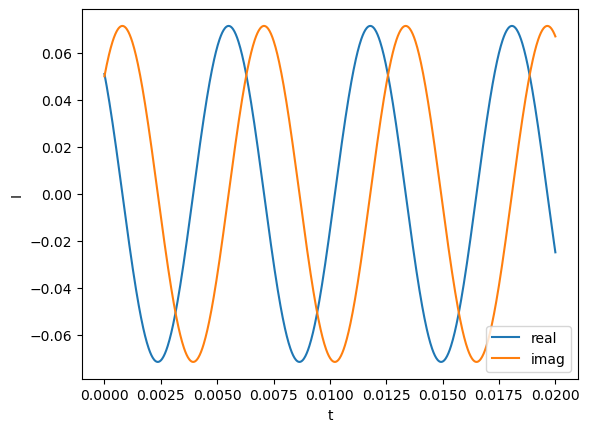

In [54]:
t = np.linspace(0, 0.02, 1000)
v0 = 10
omega = 1000.0
#omega = 7071.0678
R = 100
L = 2e-3
C = 10e-6

V = v0*np.exp(1j*omega*t)
ZR = R
ZL = 1j*omega*L
ZC = 1/(1j*omega*C)

Z = ZR + ZL + ZC

print('Complex impedance = ', Z)

phase_angle = np.arctan((omega*L - 1/(omega*C))/R)
print('Phase angle = ', phase_angle*180/np.pi)

I = V/Z

plt.plot(t, np.real(I), label='real')
plt.plot(t, np.imag(I), label='imag')
plt.xlabel('t')
plt.ylabel('I')
plt.legend()
plt.show()

Phase angle =  -44.42127443439224


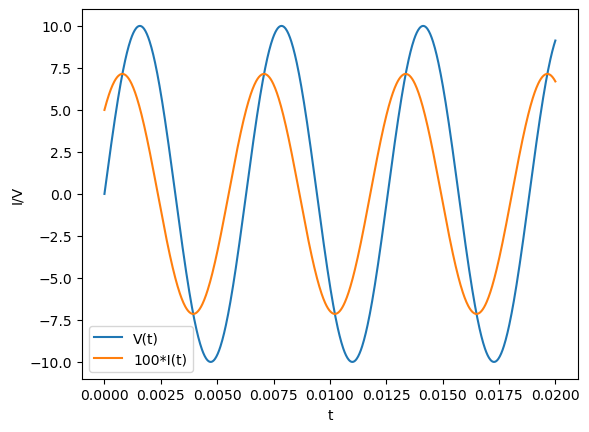

In [55]:
plt.plot(t, np.imag(V), label='V(t)')
plt.plot(t, 100*np.imag(I), label='100*I(t)')
plt.xlabel('t')
plt.ylabel('I/V')
plt.legend()

phase_angle = np.arctan((omega*L - 1/(omega*C))/R)
print('Phase angle = ', phase_angle*180/np.pi)

plt.show()

In [56]:
omega_power = np.linspace(1, 7, 10000)
omega_range = 10**omega_power

Q = []
phi = []
for omega_val in omega_range:
    V = v0*np.exp(1j*omega_val*t)
    Z = R + 1j*omega_val*L + 1/(1j*omega_val*C)
    I = V/Z
    phi.append(np.arctan((omega_val*L - 1/(omega_val*C))/R))
    Q.append(R*abs(I)/abs(V))

Resonance frequency =  7071.067811865475


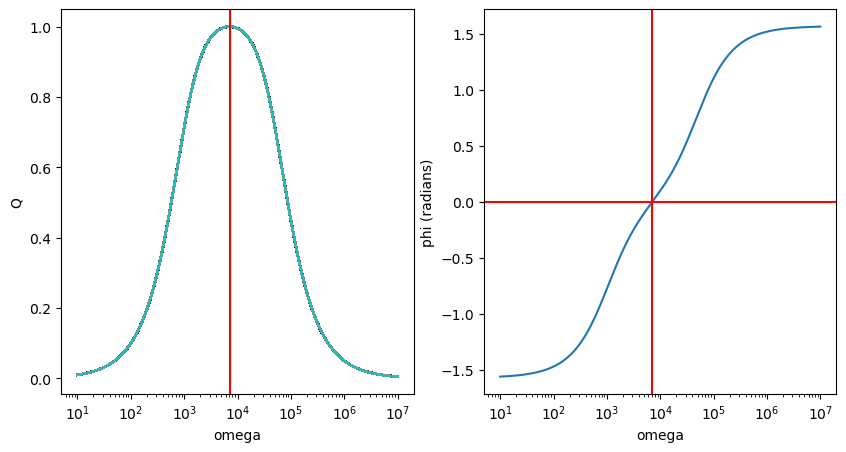

In [57]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

omega_res = 1/np.sqrt(L*C)
print('Resonance frequency = ', omega_res)

ax[0].plot(omega_range, Q)
ax[0].set_xscale('log')
ax[0].set_xlabel('omega')
ax[0].set_ylabel('Q')
# plot a vertical line at the resonance frequency
ax[0].axvline(omega_res, color='r')

ax[1].plot(omega_range, phi)
ax[1].set_xlabel('omega')
ax[1].set_ylabel('phi (radians)')
#ax[1].set_xlim(omega_res*0.95,omega_res*1.05)
#ax[1].set_ylim(-0.02,0.02)
ax[1].set_xscale('log')

# plot a vertical line at the resonance frequency
ax[1].axvline(omega_res, color='r')
ax[1].axhline(0, color='r')

plt.show()

# Conclusions

So, what's the point here?  Well, while for this actually relatively simple RLC circuit, we can solve the system traditionally, without complex methods, for other circuits that are anything other than totally simple, complex methods are invaluable!  

And, as we can see, the complex methods give us a lot of insight into the behavior of the circuit.  For example, we can see that the Q-factor is maximized at the resonance frequency, and that the phase angle of the current is maximized at the resonance frequency.  This is all very useful information that we can get from the complex methods, but not from the traditional methods.  So, the complex methods are very useful, and we should use them whenever we can!

There is a connection between a phase change and a resonance frequency.  This is a very important concept in physics and engineering, and it is very useful to be able to understand this concept.  The complex methods give us a way to understand this concept, and to be able to use it to our advantage.

# A more complicated example

Let's consider a more complicated example.  Suppose we have the following circuit:

<img src="RLC2.png">

This is a more complicated circuit, and it is not so easy to solve using traditional methods.  

Moreover, in a practical circuit, the inductor has an internal winding resistance, $R_i$.  This makes the circuit even more complicated.

However, we can solve it using complex methods.  Let's do that now.

In [170]:
v0, omega, R, Ri, L, C, t = sym.symbols('v0 omega R Ri L C t', real=True, positive=True)

V = v0*sym.exp(sym.I*omega*t)
ZC = 1/(1j*omega*C)
ZL = Ri + 1j*omega*L
ZR = R

# Impedances in parallel
Z = 1/(1/ZC + 1/ZL + 1/ZR)

I = V/Z
IL = V/ZL
IC = V/ZC
IR = V/ZR

print("Impedance = ")
sym.pprint(Z)

Z_real = sym.re(Z)
Z_imag = sym.im(Z)

print("Current = ")
sym.pprint(I)

Q = Z_real*abs(I)/abs(V)
Q_low = sym.limit(Q, omega, 0)
Q_high = sym.limit(Q, omega, sym.oo)

Q_low_value = Q_low.subs({R:100, Ri:5, L:2e-3, C:10e-6, v0:10})
Q_high_value = Q_high.subs({R:100, Ri:5, L:2e-3, C:10e-6, v0:10})

print("Q-factor at low frequency = ")
sym.pprint(Q_low)
print("Q-factor at high frequency = ")
sym.pprint(Q_high)

print("Q-factor at low frequency = ", Q_low_value)
print("Q-factor at high frequency = ", Q_high_value)

Impedance = 
              1               
──────────────────────────────
                  1          1
1.0⋅ⅈ⋅C⋅ω + ────────────── + ─
            1.0⋅ⅈ⋅L⋅ω + Ri   R
Current = 
   ⎛                  1          1⎞  ⅈ⋅ω⋅t
v₀⋅⎜1.0⋅ⅈ⋅C⋅ω + ────────────── + ─⎟⋅ℯ     
   ⎝            1.0⋅ⅈ⋅L⋅ω + Ri   R⎠       
Q-factor at low frequency = 
     _________________
    ╱  1     2     1  
   ╱  ─── + ──── + ── 
  ╱     2   R⋅Ri    2 
╲╱    Ri           R  
──────────────────────
        1    1        
        ── + ─        
        Ri   R        
Q-factor at high frequency = 
0
Q-factor at low frequency =  1
Q-factor at high frequency =  0


Complex impedance =  (4.96340776881216+1.6044285982360664j)
Real part of impedance =  4.96340776881216
Imaginary part of impedance =  1.6044285982360664


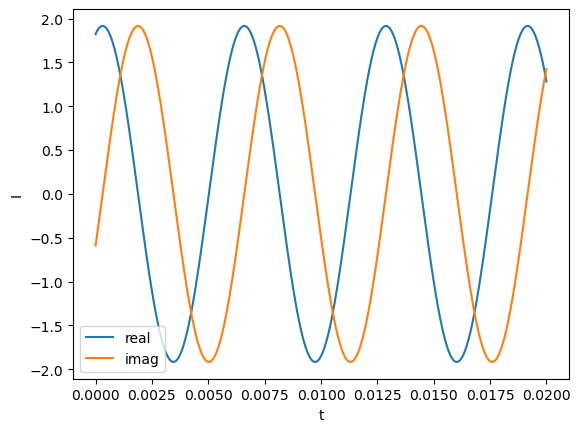

In [186]:
t = np.linspace(0, 0.02, 1000)
v0 = 10
omega = 1000.0
#omega = 7071.0678
R = 100
Ri = 5
#Ri=0
L = 2e-3
C = 10e-6

V = v0*np.exp(1j*omega*t)
ZR = R
ZL = Ri+1j*omega*L
ZC = 1/(1j*omega*C)

Z = 1./(1./ZC + 1./ZL + 1./ZR)

print('Complex impedance = ', Z)

I = V/Z
IR = V/ZR
IL = V/ZL
IC = V/ZC

print("Real part of impedance = ", np.real(Z))
print("Imaginary part of impedance = ", np.imag(Z))

plt.plot(t, np.real(I), label='real')
plt.plot(t, np.imag(I), label='imag')
plt.xlabel('t')
plt.ylabel('I')
plt.legend()
plt.show()

Phase angle =  -88.8308606720926


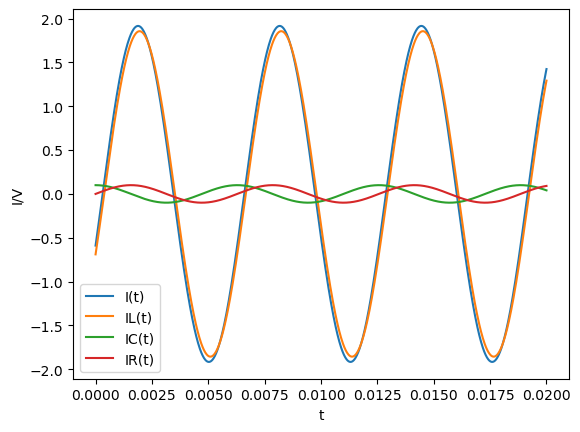

In [187]:
#plt.plot(t, np.imag(V), label='V(t)')
plt.plot(t, np.imag(I), label='I(t)')
plt.plot(t, np.imag(IL), label='IL(t)')
plt.plot(t, np.imag(IC), label='IC(t)')
plt.plot(t, np.imag(IR), label='IR(t)')
plt.xlabel('t')
plt.ylabel('I/V')
plt.legend()

phase_angle = np.arctan((omega*C - 1/(omega*L))/(1/R))
print('Phase angle = ', phase_angle*180/np.pi)

#plt.xlim(0,0.002)

plt.show()

In [188]:
omega_power = np.linspace(2, 7, 10000)
omega_range = 10**omega_power

Q = []
phi = []
for omega_val in omega_range:
    V = v0*np.exp(1j*omega_val*t)
    Z = 1./((1j*omega_val*C) + 1./(1j*omega_val*L+Ri) + 1./R)
    Z_real = np.real(Z)
    Z_imag = np.imag(Z)
    #if (omega_val >= 998 and omega_val <= 1001):
    #    print('Z = ', Z)
    #    print('Z_real = ', Z_real)
    #    print('Z_imag = ', Z_imag)
    I = V/Z
    phi.append(np.arctan(Z_imag/Z_real))
    Q.append(Z_real*abs(I)/abs(V))

Resonance frequency =  7071.067811865475


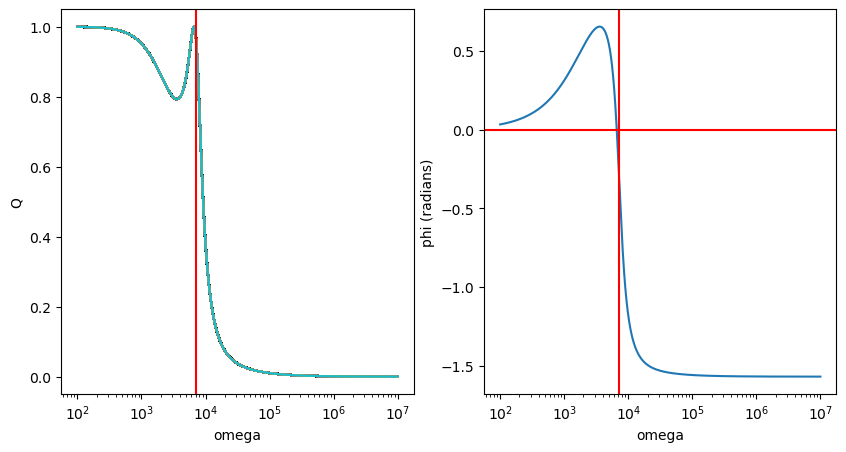

In [189]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

omega_res = 1/np.sqrt(L*C)
print('Resonance frequency = ', omega_res)

ax[0].plot(omega_range, Q)
ax[0].set_xscale('log')
ax[0].set_xlabel('omega')
ax[0].set_ylabel('Q')
# plot a vertical line at the resonance frequency
ax[0].axvline(omega_res, color='r')

ax[1].plot(omega_range, phi)
ax[1].set_xlabel('omega')
ax[1].set_ylabel('phi (radians)')
#ax[1].set_xlim(omega_res*0.95,omega_res*1.05)
#ax[1].set_ylim(-0.02,0.02)
ax[1].set_xscale('log')

# plot a vertical line at the resonance frequency
ax[1].axvline(omega_res, color='r')
ax[1].axhline(0, color='r')

plt.show()

# Conclusions

So, we can see that the complex methods are very useful for solving circuits that are more complicated than the simple RLC circuit. 